## Import Latest Cleaned Data Set

In [1]:
#Import required packages
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
#Import data
df_mean = pd.read_csv('hospitaldata_mean.csv.txt')  # filled with mean values
df_iterative = pd.read_csv('hospitaldata_iterative.csv.txt')  # filled with linear regression
df_knn = pd.read_csv('hospitaldata_knn.csv.txt')  # filled with knn

In [3]:
df_mean.head()

,Unnamed: 0,Unnamed: 0.1,Provider ID,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,...,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Hospital Name,Address,City,State,ZIP Code,Number of Completed Surveys,Survey Response Rate Percent,STAR_RATING
0,0,0,10001,3.0,14.500000,4.500000,8.9,12.5,16.2,13.7,...,86,84,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,506,21,2
1,1,1,10005,3.0,15.500000,3.230405,10.9,15.3,20.8,15.7,...,85,88,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,1135,34,3
2,2,2,10006,3.6,14.900000,3.200000,8.8,13.2,17.2,17.2,...,82,84,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,579,22,2
3,3,3,10007,2.8,13.172227,3.230405,8.3,13.3,21.6,15.9,...,86,85,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,185,27,2
4,4,4,10011,2.6,14.100000,3.700000,8.9,13.1,16.1,12.4,...,81,86,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,2193,33,3


In [4]:
df_mean.drop(["Unnamed: 0", "Unnamed: 0.1", "Provider ID", "Hospital Name", "Address", "City", "State", "ZIP Code"], \
             axis = 1, inplace = True)
df_iterative.drop(["Unnamed: 0", "Unnamed: 0.1", "Provider ID", "Hospital Name", "Address", "City", "State", "ZIP Code"], \
             axis = 1, inplace = True)
df_knn.drop(["Unnamed: 0", "Unnamed: 0.1", "Provider ID", "Hospital Name", "Address", "City", "State", "ZIP Code"], \
             axis = 1, inplace = True)

In [5]:
df_iterative.head()

,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,PSI_11_POST_RESP,PSI_12_POSTOP_PULMEMB_DVT,...,H_COMP_3_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Number of Completed Surveys,Survey Response Rate Percent,STAR_RATING
0,3.0,14.500000,4.500000,8.9,12.5,16.2,13.7,0.65,6.02,5.57,...,75.0,70.0,85.0,79.0,83.0,86.0,84.0,506.0,21.0,2.0
1,3.0,15.500000,3.996645,10.9,15.3,20.8,15.7,1.10,12.17,3.17,...,85.0,81.0,88.0,81.0,88.0,85.0,88.0,1135.0,34.0,3.0
2,3.6,14.900000,3.200000,8.8,13.2,17.2,17.2,1.28,7.19,3.31,...,83.0,76.0,83.0,80.0,84.0,82.0,84.0,579.0,22.0,2.0
3,2.8,14.439599,3.997644,8.3,13.3,21.6,15.9,1.30,9.46,4.76,...,84.0,79.0,85.0,80.0,85.0,86.0,85.0,185.0,27.0,2.0
4,2.6,14.100000,3.700000,8.9,13.1,16.1,12.4,1.74,15.22,4.53,...,83.0,77.0,86.0,82.0,87.0,81.0,86.0,2193.0,33.0,3.0


In [6]:
#Drop Star Rating given this is a Regression Model
df_mean.drop(["STAR_RATING"], axis = 1, inplace = True)
df_iterative.drop(["STAR_RATING"], axis = 1, inplace = True)
df_knn.drop(["STAR_RATING"], axis = 1, inplace = True)

## Model Development

<b>Note:</b> The following exercie was performed on each of our data sets, however for the purposes for further analysis we chose the iterative data set based on our iniital modeling results.

### Iterative Imputation Data Set with Full Data Set

#### Set Up Random Forest Regression Model

In [7]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0, max_depth=4)

#### Set Up X and Y / Train and Test Data Sets

In [8]:
dataset = df_iterative
y = dataset.loc[:,["H_RECMND_LINEAR_SCORE"]]
x = dataset.loc[:,dataset.columns != "H_RECMND_LINEAR_SCORE"]

In [9]:
#Define train_x and train_y
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#### Run Initial Model

In [10]:
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

C:\Users\zainj\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zainj\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


####  Evaluate Outputs

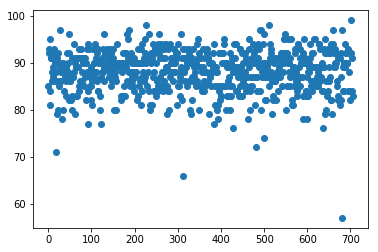

In [11]:
#look at x vs. y_test
plt.scatter(x = range(x_test.shape[0]), y = y_test)

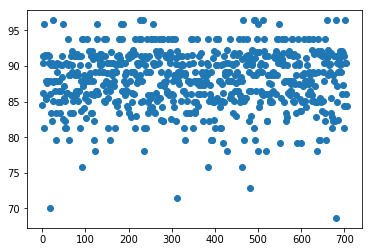

In [12]:
#look at x vs. y_pred
plt.scatter(x = range(x_test.shape[0]), y = y_pred)

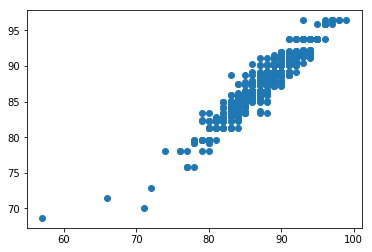

In [13]:
#look at y_test vs. y_pred
plt.scatter(x = y_test, y = y_pred)

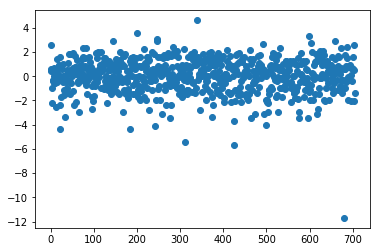

In [14]:
#look at residuals
resids = y_test["H_RECMND_LINEAR_SCORE"] - y_pred

plt.scatter(x = range(x_test.shape[0]), y = resids)

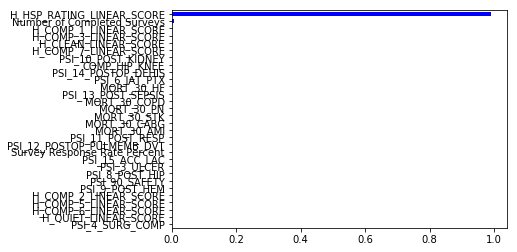

In [15]:
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_,
index = x.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='blue')
plt.show()

####  Perform Cross Validation of Model

##### Test RMSE

In [16]:
from sklearn.metrics import mean_squared_error as MSE
mse = MSE(y_test, y_pred)
rmse = mse**(1/2)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test RMSE: {:.5f}".format(rmse_dt))

Test RMSE: 1.41057


##### CV RMSE

In [17]:
from sklearn.model_selection import cross_val_score
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(rf, x_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print("CV RMSE: {:.5f}".format(RMSE_CV))

CV RMSE: 1.43683


##### Train MSE

In [18]:
# Predict the labels of the training set
y_pred_train = rf.predict(x_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.5f}'.format(RMSE_train))

Train RMSE: 1.38119


####  Analysis

Based on the results of our cross-validation, our model is likely overfitting. This may be due to our relatively small data set size and/or our use of a large number of features. For further analysis, we recommend feature engineering to see if we can reduce our overfitting problem.

### Iterative Imputation Data Set with Modified Data Set to Reduce Overfitting

#### Set Up Random Forest Regression Model

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0, max_depth = 4)

In [20]:
dataset.head()

,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,PSI_11_POST_RESP,PSI_12_POSTOP_PULMEMB_DVT,...,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Number of Completed Surveys,Survey Response Rate Percent
0,3.0,14.500000,4.500000,8.9,12.5,16.2,13.7,0.65,6.02,5.57,...,90.0,75.0,70.0,85.0,79.0,83.0,86.0,84.0,506.0,21.0
1,3.0,15.500000,3.996645,10.9,15.3,20.8,15.7,1.10,12.17,3.17,...,94.0,85.0,81.0,88.0,81.0,88.0,85.0,88.0,1135.0,34.0
2,3.6,14.900000,3.200000,8.8,13.2,17.2,17.2,1.28,7.19,3.31,...,91.0,83.0,76.0,83.0,80.0,84.0,82.0,84.0,579.0,22.0
3,2.8,14.439599,3.997644,8.3,13.3,21.6,15.9,1.30,9.46,4.76,...,94.0,84.0,79.0,85.0,80.0,85.0,86.0,85.0,185.0,27.0
4,2.6,14.100000,3.700000,8.9,13.1,16.1,12.4,1.74,15.22,4.53,...,91.0,83.0,77.0,86.0,82.0,87.0,81.0,86.0,2193.0,33.0


#### Set Up X and Y / Train and Test Data Sets

In [21]:
dataset = df_iterative
y = dataset.loc[:,["H_RECMND_LINEAR_SCORE"]]
x_mod = dataset.loc[:,dataset.columns != "H_RECMND_LINEAR_SCORE"]
x_mod = x_mod.drop(["H_HSP_RATING_LINEAR_SCORE", "H_COMP_7_LINEAR_SCORE", "H_COMP_1_LINEAR_SCORE", "H_COMP_2_LINEAR_SCORE", \
                   "H_COMP_5_LINEAR_SCORE", "H_COMP_6_LINEAR_SCORE"], axis = 1)
#x_mod = x_mod.loc[:, ["H_HSP_RATING_LINEAR_SCORE", "H_QUIET_LINEAR_SCORE", "Number of Completed Surveys"]]
#x_mod.drop(["H_HSP_RATING_LINEAR_SCORE", "H_COMP_7_LINEAR_SCORE", "H_COMP_1_LINEAR_SCORE", "H_COMP_2_LINEAR_SCORE",\
#           "H_COMP_5_LINEAR_SCORE", "H_COMP_3_LINEAR_SCORE", "H_COMP_6_LINEAR_SCORE", "H_CLEAN_LINEAR_SCORE",\
#           "H_QUIET_LINEAR_SCORE", "Survey Response Rate Percent", "MORT_30_CABG", "Number of Completed Surveys", \
#           "PSI_11_POST_RESP", "MORT_30_AMI"], axis = 1, inplace = True)

<b>Note:</b> This step was performed several times with various combinations of features based upon the model outputs (e.g., feature importance, cross validation results, etc.). In addition, this exercise was attempted with various model parameters (e.g., maximum depth and minimum leaf size). For the purposes of this workbook, only one iteration is shown.

In [22]:
#Define train_x and train_y
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_mod,y,test_size=0.2,random_state=0)

#### Run Initial Model

In [23]:
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

C:\Users\zainj\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zainj\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


####  Evaluate Outputs

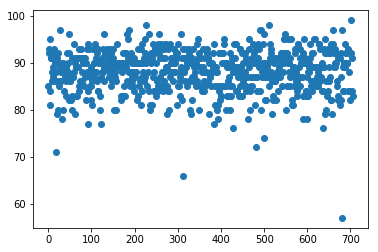

In [24]:
#look at x vs. y_test
plt.scatter(x = range(x_test.shape[0]), y = y_test)

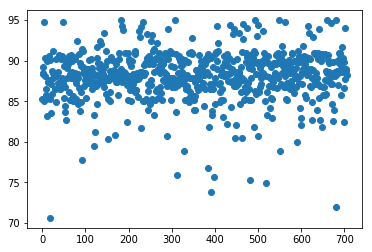

In [25]:
#look at x vs. y_pred
plt.scatter(x = range(x_test.shape[0]), y = y_pred)

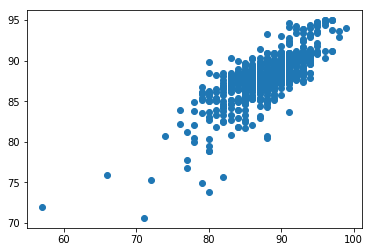

In [26]:
#look at y_test vs. y_pred
plt.scatter(x = y_test, y = y_pred)

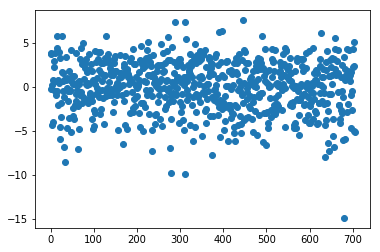

In [27]:
#look at residuals
resids = y_test["H_RECMND_LINEAR_SCORE"] - y_pred

plt.scatter(x = range(x_test.shape[0]), y = resids)

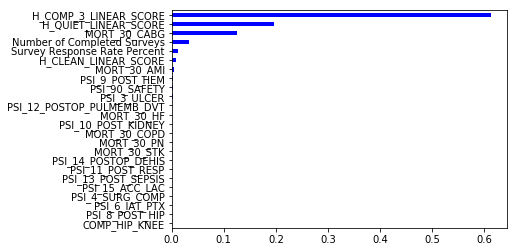

In [28]:
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_,
index = x_mod.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='blue')
plt.show()

####  Perform Cross Validation of Model

##### Test RMSE

In [29]:
from sklearn.metrics import mean_squared_error as MSE
mse = MSE(y_test, y_pred)
rmse = mse**(1/2)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test RMSE: {:.5f}".format(rmse_dt))

Test RMSE: 2.89547


##### CV RMSE

In [30]:
from sklearn.model_selection import cross_val_score
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(rf, x_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print("CV RMSE: {:.5f}".format(RMSE_CV))

CV RMSE: 2.87115


##### Train MSE

In [31]:
# Predict the labels of the training set
y_pred_train = rf.predict(x_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.5f}'.format(RMSE_train))

Train RMSE: 2.68913


## Conclusion

Based upon the cross-validation results accross several iterations of the random forest regression model - based upon modifying the features used and tuning the model parameters - we were unable to develop an effective model that did not overfit. We believe this may be due to the decision tree approach utilized by the random forest model and the relative small size of the data (approximately 3,500 hospitals). Therefore, we ultimately do not recommend utilizing the Random Forest Regression model.